# Compositional analysis of the ACM cardiac leucocytes 6mpi dataset (Pkp2+Ttn) - myeloids - using scCoda `pertpy`:
- **Developed by**: Christian Eger
- **Modified by**: Alexandra Cirnu
- **Talavera-López Lab - Würzburg Institute for Systems Immunology - Faculty of Medicine - Julius Maximilian Universität Würzburg**
- **Created on**: 231214
- **Last modified**: 240509

#### Environment: scCoda

To install `pertpy` on MacOS create a new mamba environment and activte it. Then go int 'github' folder and type 'git clone https://github.com/theislab/pertpy.git'. Change directory to 'pertpy' and type 'pip install .' 

Look at website to solve problem at the end: https://www.sc-best-practices.org/conditions/compositional.html

In [40]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")
import numpy as np
            #import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import altair as alt
import scanpy as sc
import pertpy as pt
from statannot import add_stat_annotation
from scipy import stats
import muon as mu
from muon import atac as ac
from muon import prot

In [41]:
sc.logging.print_versions() 

-----
anndata     0.10.5.post1
scanpy      1.9.8
-----
PIL                         10.2.0
absl                        NA
adjustText                  1.0.4
altair                      4.2.2
arrow                       1.3.0
arviz                       0.17.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
blitzgsea                   NA
certifi                     2024.02.02
cffi                        1.16.0
chardet                     5.2.0
charset_normalizer          3.3.2
chex                        0.1.85
colorama                    0.4.6
comm                        0.2.1
contextlib2                 NA
custom_inherit              2.4.1
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
decoupler                   1.6.0
docrep                      0.3.2
entrypoints                 0.4
etils                       1.7.

Manual git installation of pertpy necessary due to Apple silicon
$ git clone https://github.com/theislab/pertpy.git
$ cd pertpy
$ pip install .

In [42]:
input = '/home/acirnu/github/ACM_Mouse_Immune/Workflow/5_Leiden_clustering+annotation_on_all_conditions/C_merge_lymphoids+myeloids/ACM_annotated_muon_ac240727.raw.h5mu'
mdata_data = mu.read_h5mu(input)
mdata_data

MuData object with n_obs × n_vars = 44586 × 29477
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	44586 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    prot:	44586 x 99
      obs:	'library', 'batch', 'lineage'
      var:	'gene_ids', 'feature_types'
      uns:	'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'counts', 'log_norm'

In [43]:
adata = mdata_data.mod["rna"]
adata = adata[adata.obs['model'].isin(["Pkp2"]) , :]
adata

View of AnnData object with n_obs × n_vars = 30280 × 29378
    obs: 'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo'
    obsm: 'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [44]:
adata.obs

,cell_source,donor,n_counts,sample,condition,genotype,infection,library,model,n_genes_by_counts,...,G2M_score,_scvi_batch,_scvi_labels,batch,leiden,classification,phenotype,annotation,lineage,general_celltype
AAACGCTGTTGTGTTG-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,478.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,365.0,...,-0.083225,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAACGCTTCTCGCTCA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_1,3581.0,Pkp2_Ctr_noninf_1,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,1599.0,...,-0.390143,6,8,reference,3,MØ_Elmo1+,pro-inflammatory,MØ_Elmo1+,myeloid,Dock4+_MØ
AAAGGTACAGAACATA-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,16539.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3854.0,...,-0.578955,7,6,reference,6,Mono_Cd14+Ly6c+,pro-inflammatory,Mono_Cd14+Ly6c+,myeloid,Monocyte
AAAGTCCAGGGACACT-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,13389.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3788.0,...,-0.370084,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
AAAGTCCCAGTAGGAC-1-A1,AG_Gerull,Pkp2_Ctr_noninf_2,12092.0,Pkp2_Ctr_noninf_2,Pkp2_Ctr_noninf,Pkp2_Ctr,noninf,A1,Pkp2,3493.0,...,-0.357287,7,10,reference,2,MØ_Mertk+Il10+,anti-inflammatory,MØ_Mertk+Il10+,myeloid,MØ_general
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCAGCGGGTTA-1-A4,AG_Gerull,Pkp2_Ctr_MCMV_5,4524.0,Pkp2_Ctr_MCMV_5,Pkp2_Ctr_MCMV,Pkp2_Ctr,MCMV,A4,Pkp2,1699.0,...,-0.064866,4,29,query,1,Tem/Trm-Cd8+,pro-inflammatory,Tem/Trm-Cd8+,lymphoid,Cd8_T_cell
TTTGATCTCTCGCCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,17569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,4270.0,...,-0.076327,14,27,query,9,cDC2,pro-inflammatory,cDC2,myeloid,DC
TTTGGAGAGATGCGAC-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,569.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,424.0,...,-0.146335,14,29,query,3,Th1_Cd4+,pro-inflammatory,Th1_Cd4+,lymphoid,Cd4_T_cell
TTTGGAGAGGACGCTA-1-A4,AG_Gerull,Pkp2_HetKO_MCMV_5,7031.0,Pkp2_HetKO_MCMV_5,Pkp2_HetKO_MCMV,Pkp2_HetKO,MCMV,A4,Pkp2,2463.0,...,-0.416546,14,21,query,7,Tem_Cd8+,pro-inflammatory,Tem_Cd8+,lymphoid,Cd8_T_cell


In [45]:
new_order_genotype = ['Pkp2_Ctr', 'Pkp2_HetKO']
adata.obs["genotype"] = adata.obs["genotype"].cat.reorder_categories(new_order_genotype, ordered=True)

adata.obs["genotype"].cat.categories

Index(['Pkp2_Ctr', 'Pkp2_HetKO'], dtype='object')

In [46]:
new_order_infection = ['noninf', 'MCMV']
adata.obs["infection"] = adata.obs["infection"].cat.reorder_categories(new_order_infection, ordered=True)

adata.obs["infection"].cat.categories

Index(['noninf', 'MCMV'], dtype='object')

In [47]:
new_order_condition = ['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV', 'Pkp2_HetKO_MCMV']
adata.obs["condition"] = adata.obs["condition"].cat.reorder_categories(new_order_condition, ordered=True)

adata.obs["condition"].cat.categories

Index(['Pkp2_Ctr_noninf', 'Pkp2_HetKO_noninf', 'Pkp2_Ctr_MCMV',
       'Pkp2_HetKO_MCMV'],
      dtype='object')

create notebook for every compartment and compare across cell states
visualization improvement
reference to ctrl healthy

In [48]:
sccoda_model = pt.tl.Sccoda()
sccoda_data = sccoda_model.load(
    adata,
    type="cell_level",
    generate_sample_level=True,
    cell_type_identifier="annotation",
    sample_identifier="sample",
    covariate_obs=["genotype", "infection", "condition"],
)
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'

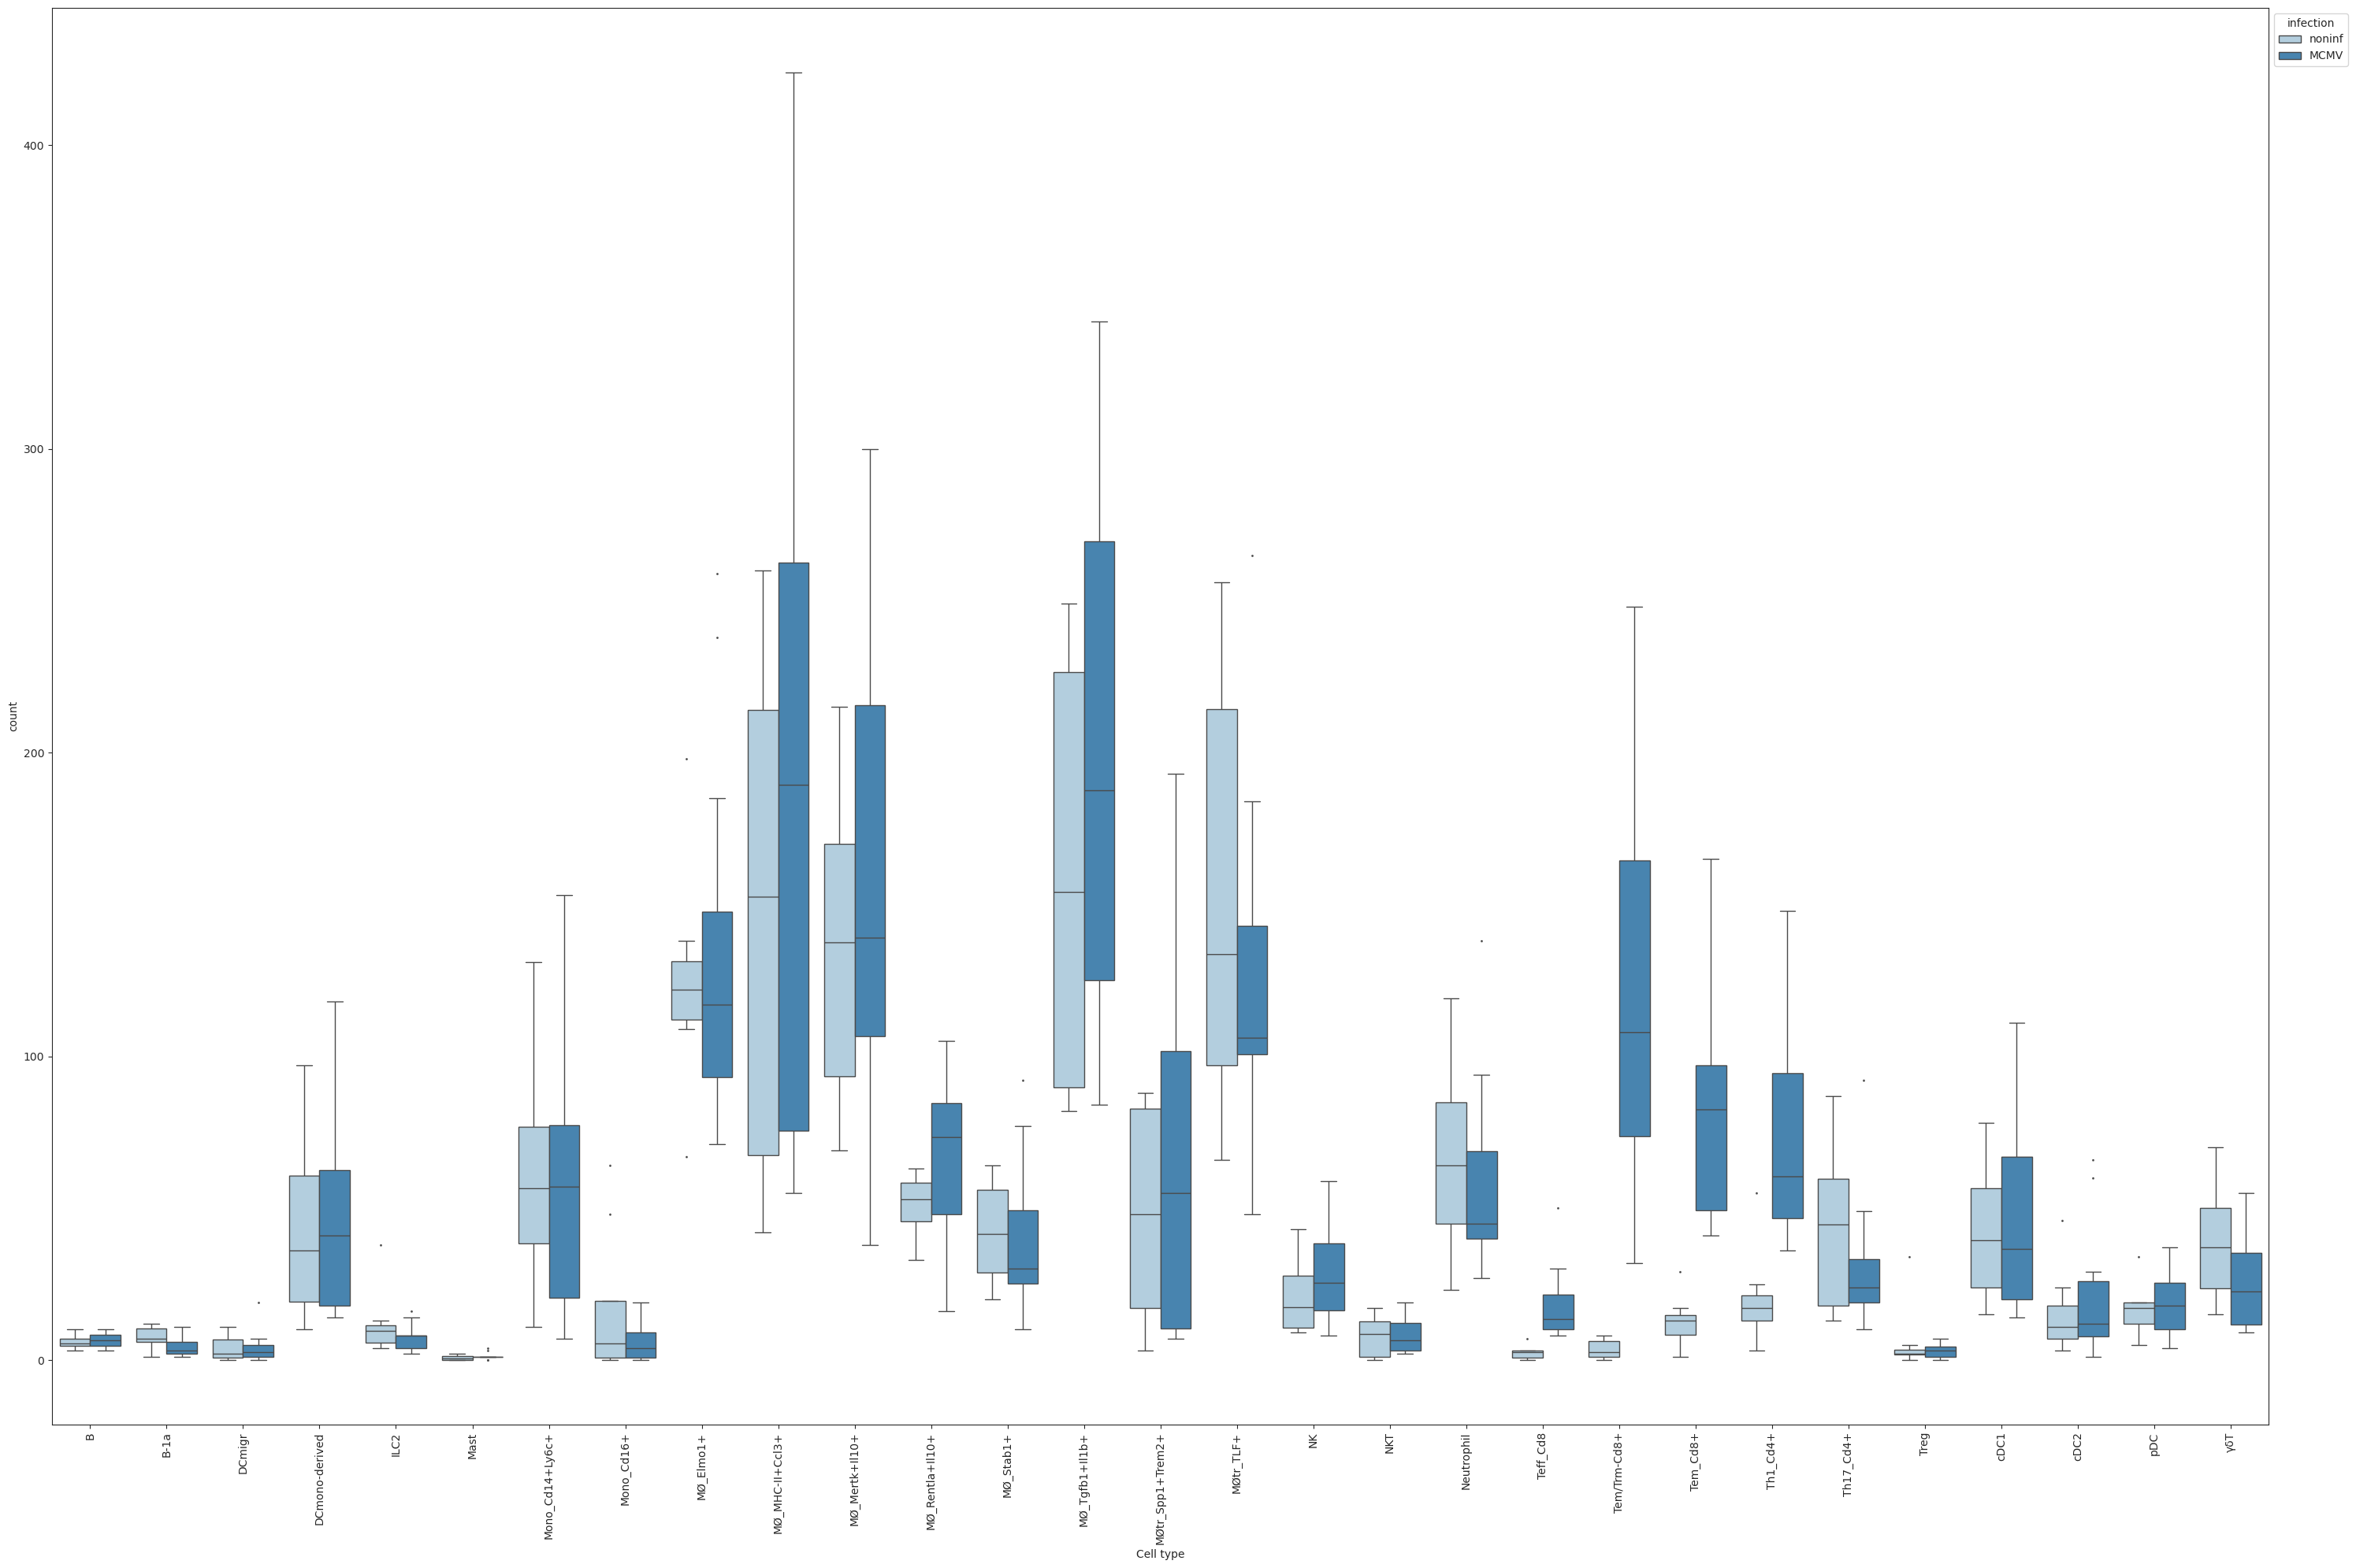

In [49]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    y_scale="count",
    figsize=(30, 20),
    add_dots=False,
    args_swarmplot={"palette": ["red"]},
)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_infection_Pkp2_combined_barplot.png", format='png')
plt.show()

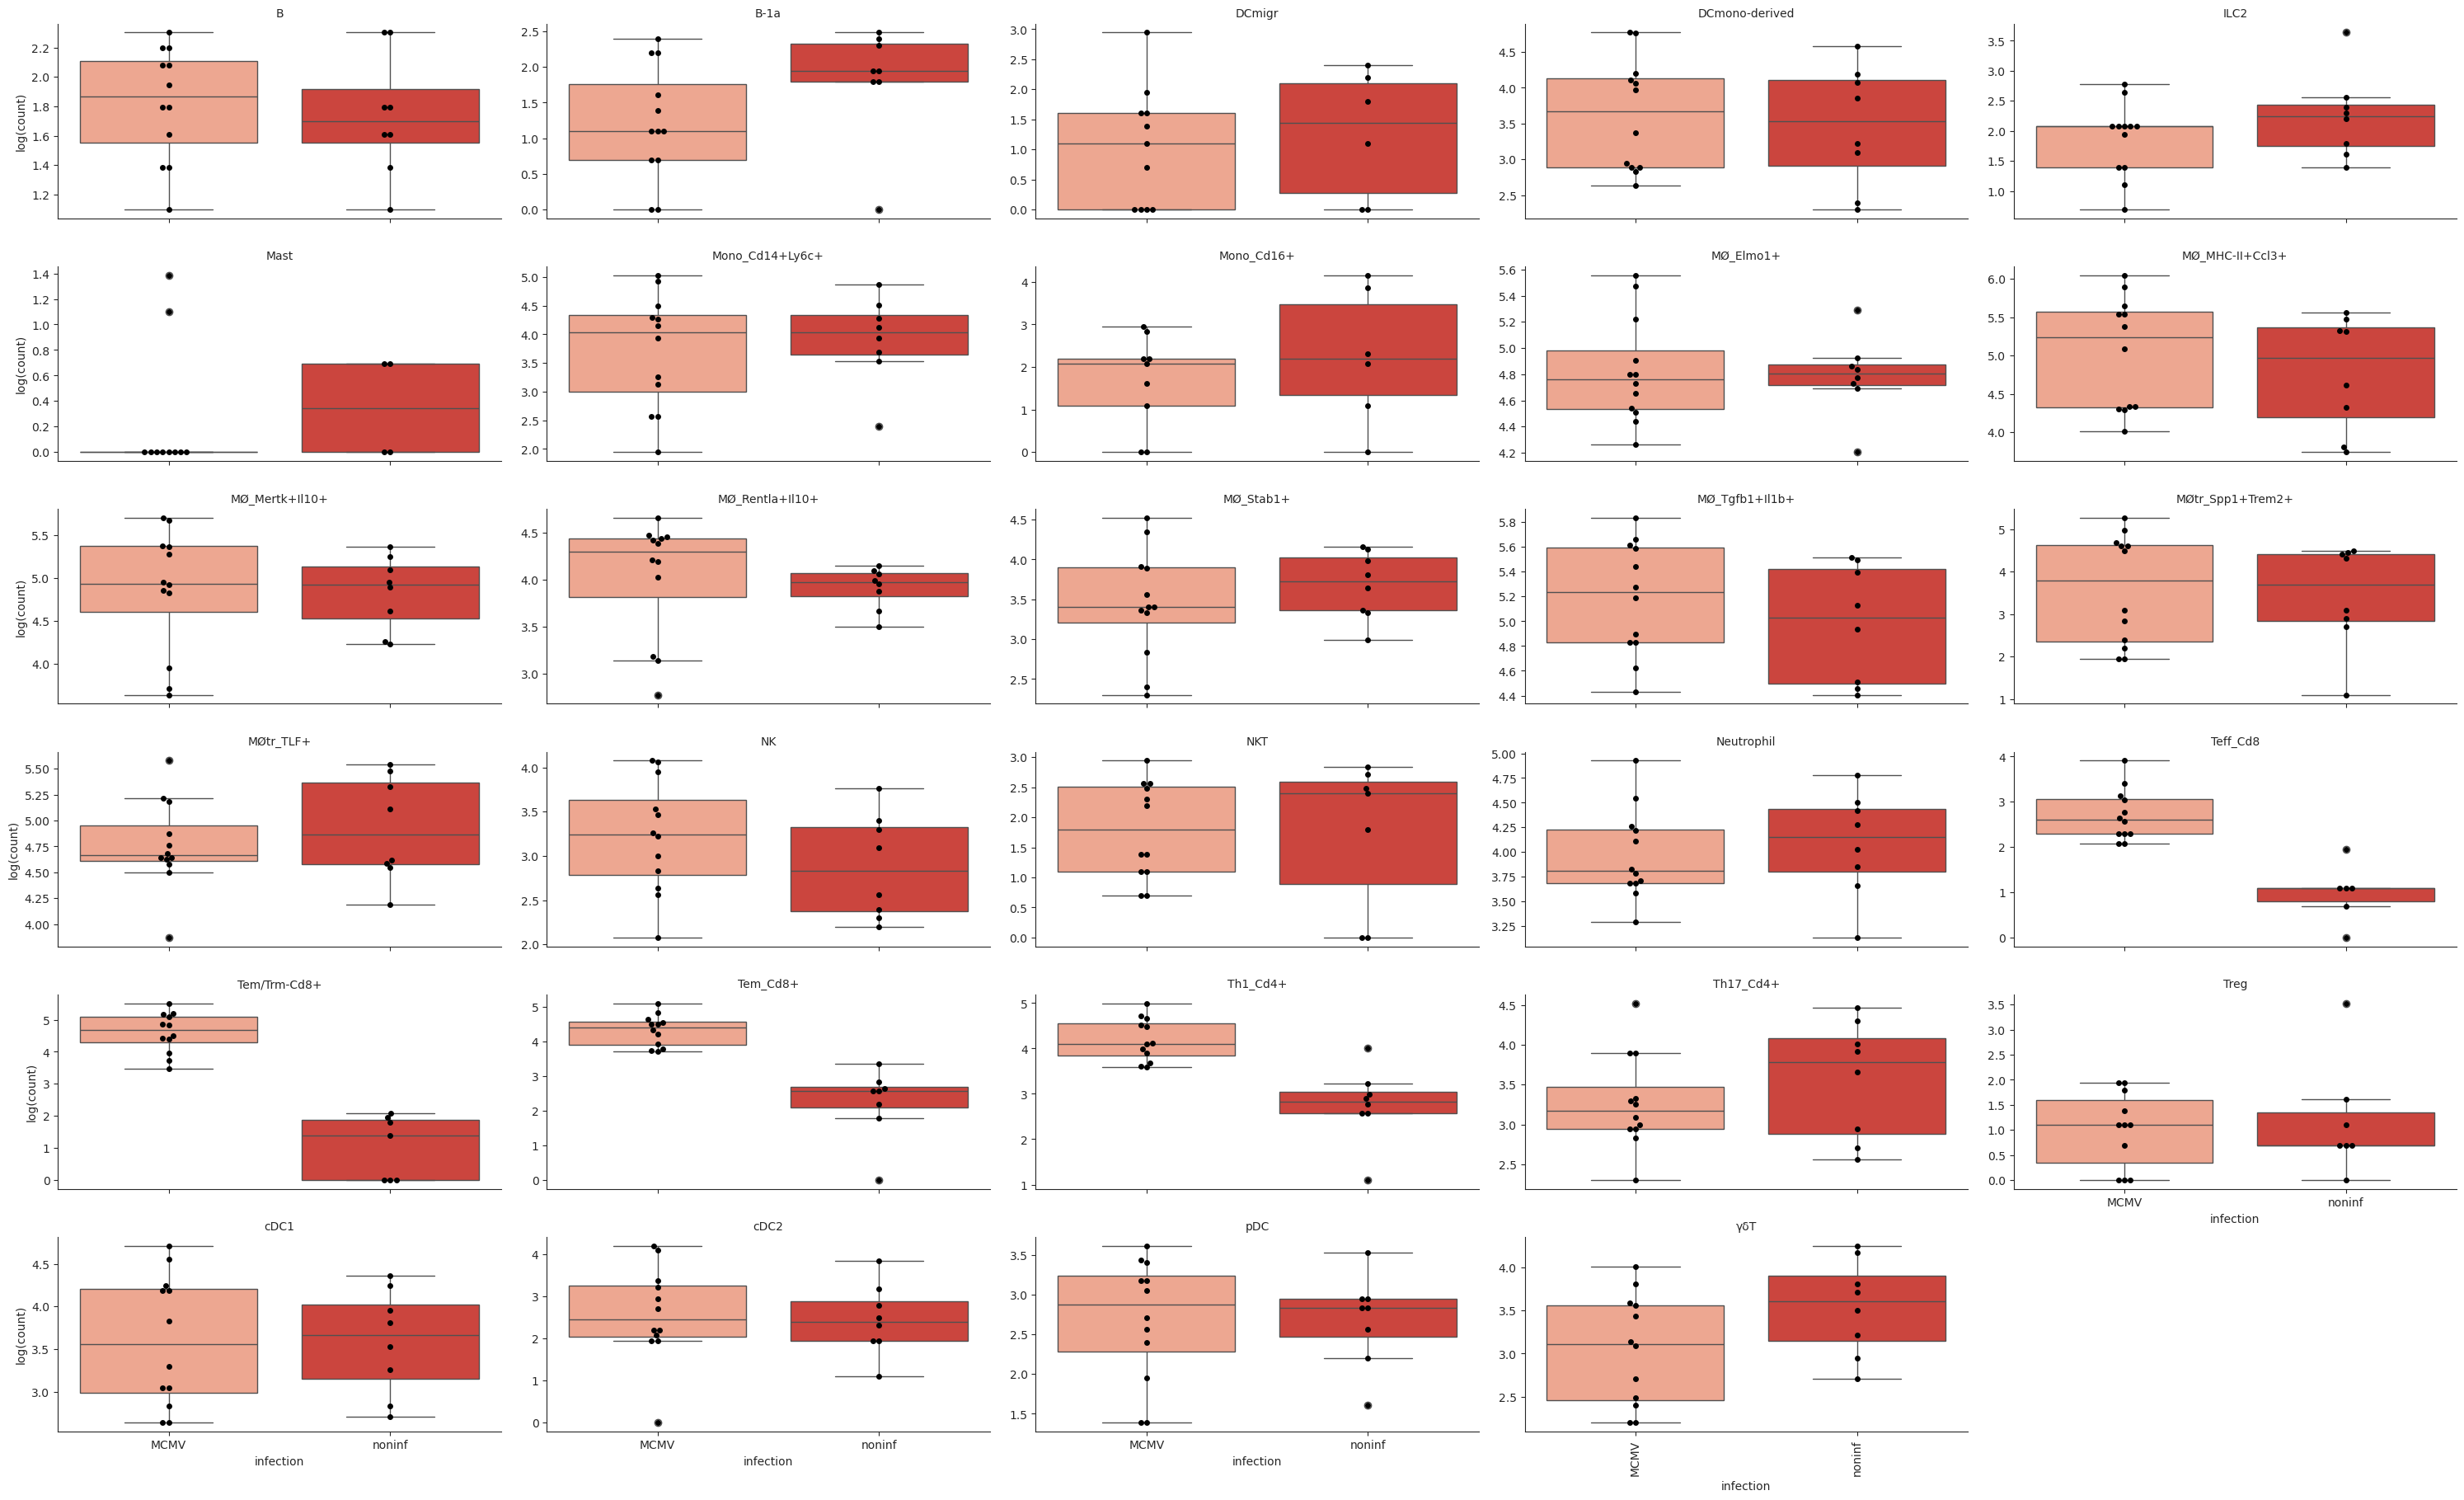

In [50]:
pt.pl.coda.boxplots(
    sccoda_data,
    modality_key="coda",
    feature_name="infection",
    plot_facets=True,
    y_scale="log",
    add_dots=True,
    cmap="Reds",
)
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_infection_Pkp2_single_barplots.png", format='png')
plt.show()

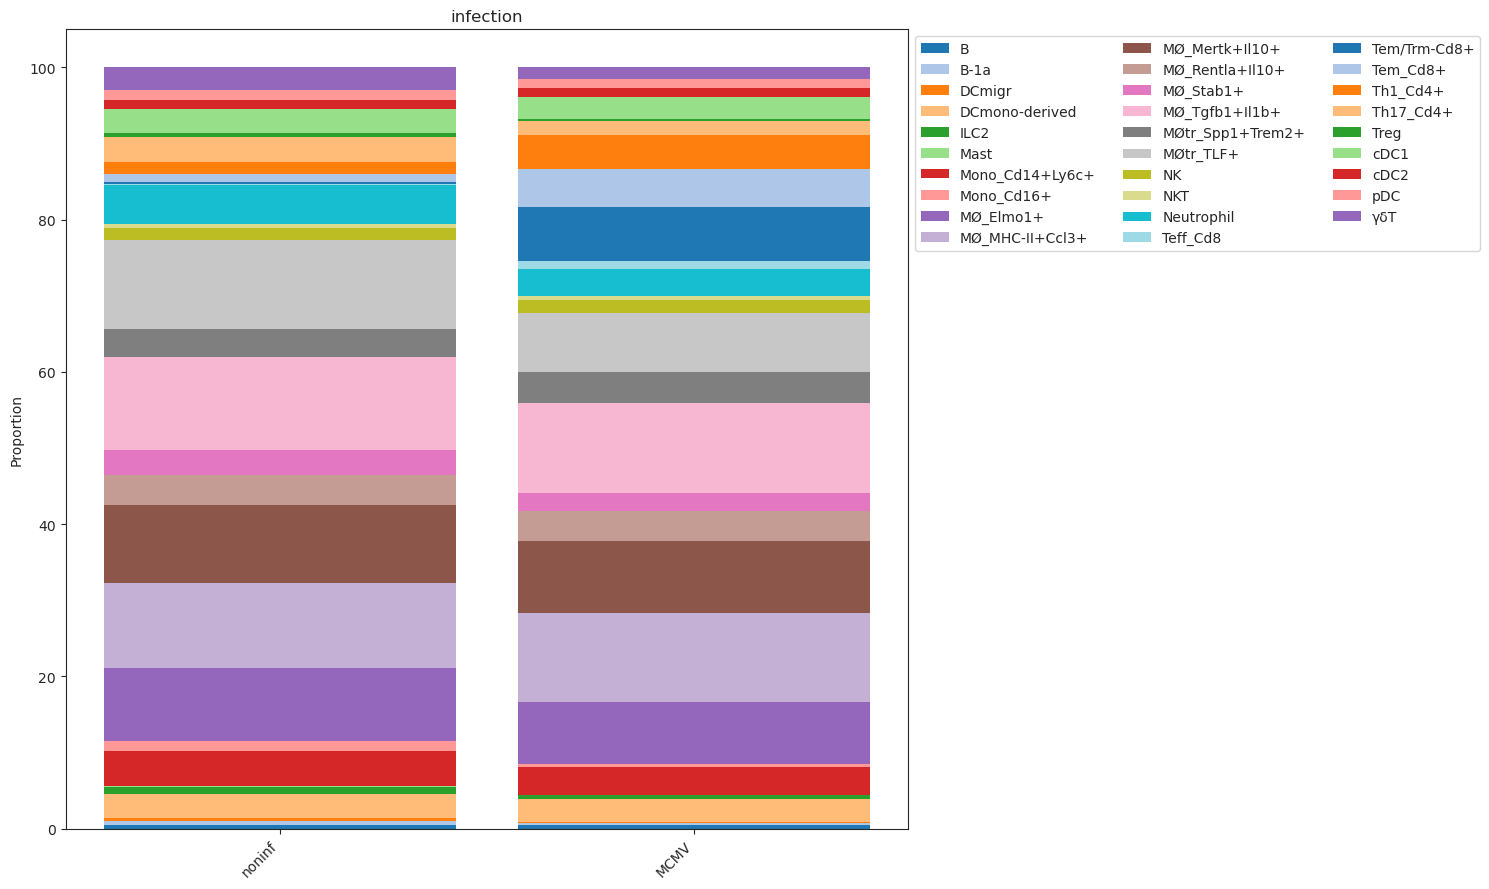

In [51]:
pt.pl.coda.stacked_barplot(
    sccoda_data, modality_key="coda", feature_name="infection", figsize=(15, 9) 
)
plt.legend(ncol=3, loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [52]:
sccoda_data = sccoda_model.prepare(
    sccoda_data,
    modality_key="coda",
    formula="infection",
    reference_cell_type="automatic",
)
sccoda_data["coda"]

Automatic reference selection! Reference cell type set to pDC

Zero counts encountered in data! Added a pseudocount of 0.5.

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'

Run No-U-turn HMC sampling (nuts)

In [53]:
sccoda_model.run_nuts(sccoda_data, modality_key="coda", rng_key=1234)

sample: 100%|██████████| 11000/11000 [04:37<00:00, 39.57it/s, 255 steps of size 1.00e-02. acc. prob=0.85]


In [54]:
sccoda_data["coda"]

AnnData object with n_obs × n_vars = 20 × 29
    obs: 'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
    var: 'n_cells'
    uns: 'scCODA_params'
    obsm: 'covariate_matrix', 'sample_counts'
    varm: 'intercept_df', 'effect_df_infection[T.MCMV]'

#### Result interpreteation

**Intercepts**

The first column of the intercept summary shows the parameters determined by the MCMC inference.

The “Expected sample” column gives some context to the numerical values. If we had a new sample (with no active covariates) with a total number of cells equal to the mean sampling depth of the dataset, then this distribution over the cell types would be most likely.

**Effects**

For the effect summary, the first column again shows the inferred parameters for all combinations of covariates and cell types. Most important is the distinctions between zero and non-zero entries A value of zero means that no statistically credible effect was detected. For a value other than zero, a credible change was detected. A positive sign indicates an increase, a negative sign a decrease in abundance.

Since the numerical values of the “Final Parameter” column are not straightforward to interpret, the “Expected sample” and “log2-fold change” columns give us an idea on the magnitude of the change. The expected sample is calculated for each covariate separately (covariate value = 1, all other covariates = 0), with the same method as for the intercepts. The log-fold change is then calculated between this expected sample and the expected sample with no active covariates from the intercept section. Since the data is compositional, cell types for which no credible change was detected, can still change in abundance as well, as soon as a credible effect is detected on another cell type due to the sum-to-one constraint. If there are no credible effects for a covariate, its expected sample will be identical to the intercept sample, therefore the log2-fold change is 0.

In [55]:
sccoda_model.summary(sccoda_data, modality_key= "coda")

                                          Compositional Analysis summary                                           
┌────────────────────────────────────────────┬────────────────────────────────────────────────────────────────────┐
│ Name                                       │ Value                                                              │
├────────────────────────────────────────────┼────────────────────────────────────────────────────────────────────┤
│ Data                                       │ Data: 20 samples, 29 cell types                                    │
│ Reference cell type                        │ pDC                                                                │
│ Formula                                    │ infection                                                          │
└────────────────────────────────────────────┴────────────────────────────────────────────────────────────────────┘

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Intercepts                                                                                                      │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                   Final Parameter  Expected Sample                                                              │
│ Cell Type                                                                                                       │
│ B                      0.059           11.592                                                                   │
│ B-1a                  -0.052           10.374                                                                   │
│ DCmigr                -0.466            6.857                                                                   │
│ DCmono-derived         1.466           47.339                                                                   │
│ ILC2                   0.268           14.287                                                                   │
│ Mast                  -0.885            4.510                                                                   │
│ Mono_Cd14+Ly6c+        1.735           61.950                                                                   │
│ Mono_Cd16+            -0.129            9.605                                                                   │
│ MØ_Elmo1+              2.636          152.526                                                                   │
│ MØ_MHC-II+Ccl3+        2.689          160.828                                                                   │
│ MØ_Mertk+Il10+         2.684          160.025                                                                   │
│ MØ_Rentla+Il10+        1.838           68.671                                                                   │
│ MØ_Stab1+              1.479           47.958                                                                   │
│ MØ_Tgfb1+Il1b+         2.880          194.675                                                                   │
│ MØtr_Spp1+Trem2+       1.486           48.295                                                                   │
│ MØtr_TLF+              2.687          160.506                                                                   │
│ NK                     1.002           29.765                                                                   │
│ NKT                   -0.008           10.841                                                                   │
│ Neutrophil             1.897           72.845                                                                   │
│ Teff_Cd8              -0.516            6.523                                                                   │
│ Tem/Trm-Cd8+          -0.283            8.235                                                                   │
│ Tem_Cd8+               0.486           17.767                                                                   │
│ Th1_Cd4+               0.837           25.238                                                                   │
│ Th17_Cd4+              1.378           43.351                                                                   │
│ Treg                  -0.421            7.173                                                                   │
│ cDC1                   1.507           49.320                                                                   │
│ cDC2                   0.611           20.132                                                                   │
│ pDC                    0.734           22.767                                                                   │
│ γδT                    1.311           40.542                                                                   │
└───────────────────────────────────────────────────────

┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│ Effects                                                                                                         │
├─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│                                   Final Parameter  Expected Sample  log2-fold change                            │
│ Covariate       Cell Type                                                                                       │
│ infectionT.MCMV B                     0.000             9.864            -0.233                                 │
│                 B-1a                  0.000             8.828            -0.233                                 │
│                 DCmigr                0.000             5.835            -0.233                                 │
│                 DCmono-derived        0.000            40.283            -0.233                                 │
│                 ILC2                  0.000            12.157            -0.233                                 │
│                 Mast                  0.000             3.838            -0.233                                 │
│                 Mono_Cd14+Ly6c+       0.000            52.717            -0.233                                 │
│                 Mono_Cd16+            0.000             8.174            -0.233                                 │
│                 MØ_Elmo1+             0.000           129.793            -0.233                                 │
│                 MØ_MHC-II+Ccl3+       0.000           136.857            -0.233                                 │
│                 MØ_Mertk+Il10+        0.000           136.175            -0.233                                 │
│                 MØ_Rentla+Il10+       0.000            58.436            -0.233                                 │
│                 MØ_Stab1+             0.000            40.810            -0.233                                 │
│                 MØ_Tgfb1+Il1b+        0.000           165.660            -0.233                                 │
│                 MØtr_Spp1+Trem2+      0.000            41.097            -0.233                                 │
│                 MØtr_TLF+             0.000           136.584            -0.233                                 │
│                 NK                    0.000            25.329            -0.233                                 │
│                 NKT                   0.000             9.225            -0.233                                 │
│                 Neutrophil            0.000            61.988            -0.233                                 │
│                 Teff_Cd8              1.219            18.778             1.525                                 │
│                 Tem/Trm-Cd8+          2.707           105.044             3.673                                 │
│                 Tem_Cd8+              1.665            79.938             2.170                                 │
│                 Th1_Cd4+              1.197            71.121             1.495                                 │
│                 Th17_Cd4+             0.000            36.890            -0.233                                 │
│                 Treg                  0.000             6.104            -0.233                                 │
│                 cDC1                  0.000            41.969            -0.233                                 │
│                 cDC2                  0.000            17.132            -0.233                                 │
│                 pDC                   0.000            19.374            -0.233                                 │
│                 γδT                   0.000            34.499            -0.233                                 │
└───────────────────────────────────────────────────────

### Filter out credible effects

In [56]:
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate          Cell Type       
infection[T.MCMV]  B                   False
                   B-1a                False
                   DCmigr              False
                   DCmono-derived      False
                   ILC2                False
                   Mast                False
                   Mono_Cd14+Ly6c+     False
                   Mono_Cd16+          False
                   MØ_Elmo1+           False
                   MØ_MHC-II+Ccl3+     False
                   MØ_Mertk+Il10+      False
                   MØ_Rentla+Il10+     False
                   MØ_Stab1+           False
                   MØ_Tgfb1+Il1b+      False
                   MØtr_Spp1+Trem2+    False
                   MØtr_TLF+           False
                   NK                  False
                   NKT                 False
                   Neutrophil          False
                   Teff_Cd8             True
                   Tem/Trm-Cd8+         True
                   

##### Adjust the "false discovery rate"

In [57]:
#If needed adjust the 'false discovery rate' - default is 0.05, however when no effects are detected it can be incresed to up to 0.2
sccoda_model.set_fdr(sccoda_data, 0.2)
sccoda_model.credible_effects(sccoda_data, modality_key="coda")

Covariate          Cell Type       
infection[T.MCMV]  B                   False
                   B-1a                False
                   DCmigr              False
                   DCmono-derived      False
                   ILC2                False
                   Mast                False
                   Mono_Cd14+Ly6c+     False
                   Mono_Cd16+          False
                   MØ_Elmo1+           False
                   MØ_MHC-II+Ccl3+      True
                   MØ_Mertk+Il10+      False
                   MØ_Rentla+Il10+     False
                   MØ_Stab1+           False
                   MØ_Tgfb1+Il1b+      False
                   MØtr_Spp1+Trem2+    False
                   MØtr_TLF+           False
                   NK                  False
                   NKT                 False
                   Neutrophil          False
                   Teff_Cd8             True
                   Tem/Trm-Cd8+         True
                   

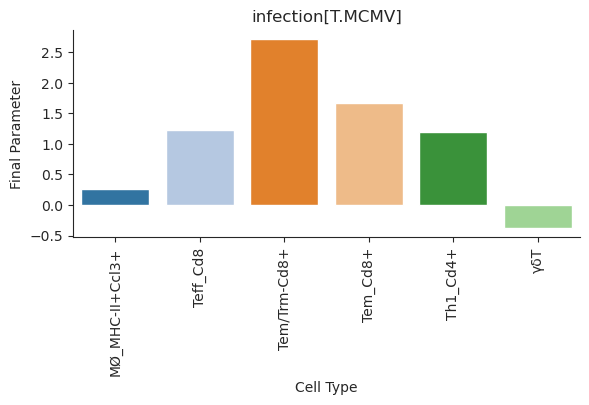

In [58]:
pt.pl.coda.effects_barplot(sccoda_data, modality_key="coda", parameter="Final Parameter")

In [59]:
sccoda_data

MuData object with n_obs × n_vars = 30300 × 29407
  2 modalities
    rna:	30280 x 29378
      obs:	'cell_source', 'donor', 'n_counts', 'sample', 'condition', 'genotype', 'infection', 'library', 'model', 'n_genes_by_counts', 'total_counts', 'doublet_scores', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', '_scvi_batch', '_scvi_labels', 'batch', 'leiden', 'classification', 'phenotype', 'annotation', 'lineage', 'general_celltype'
      var:	'gene_ids', 'feature_types', 'mt', 'ribo'
      obsm:	'X_pca', 'X_scANVI', 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs'
      obsp:	'connectivities', 'distances'
    coda:	20 x 29
      obs:	'cell_source', 'donor', 'condition', 'genotype', 'infection', 'model', '_scvi_batch', 'batch'
      var:	'n_cells'
      uns:	'scCODA_params'
      obsm:	'covariate_matrix', 'sample_counts'
      varm:	'intercept_df', 'effect_df_infection[T.MCMV]'

In [60]:
sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"]

,Final Parameter,HDI 3%,HDI 97%,SD,Inclusion probability,Expected Sample,log2-fold change
Cell Type,,,,,,,
B,0.000000,-0.562,0.673,0.181,0.3094,9.680448,-0.260010
B-1a,0.000000,-1.031,0.310,0.269,0.3783,8.663408,-0.260010
DCmigr,0.000000,-0.666,0.770,0.213,0.3217,5.726521,-0.260010
DCmono-derived,0.000000,-0.263,0.535,0.117,0.2554,39.531911,-0.260010
ILC2,0.000000,-0.841,0.353,0.212,0.3383,11.930620,-0.260010
Mast,0.000000,-0.653,0.873,0.235,0.3349,3.766357,-0.260010
Mono_Cd14+Ly6c+,0.000000,-0.499,0.176,0.116,0.2654,51.733638,-0.260010
Mono_Cd16+,0.000000,-0.975,0.431,0.262,0.3813,8.021362,-0.260010
MØ_Elmo1+,0.000000,-0.202,0.233,0.052,0.1928,127.371525,-0.260010


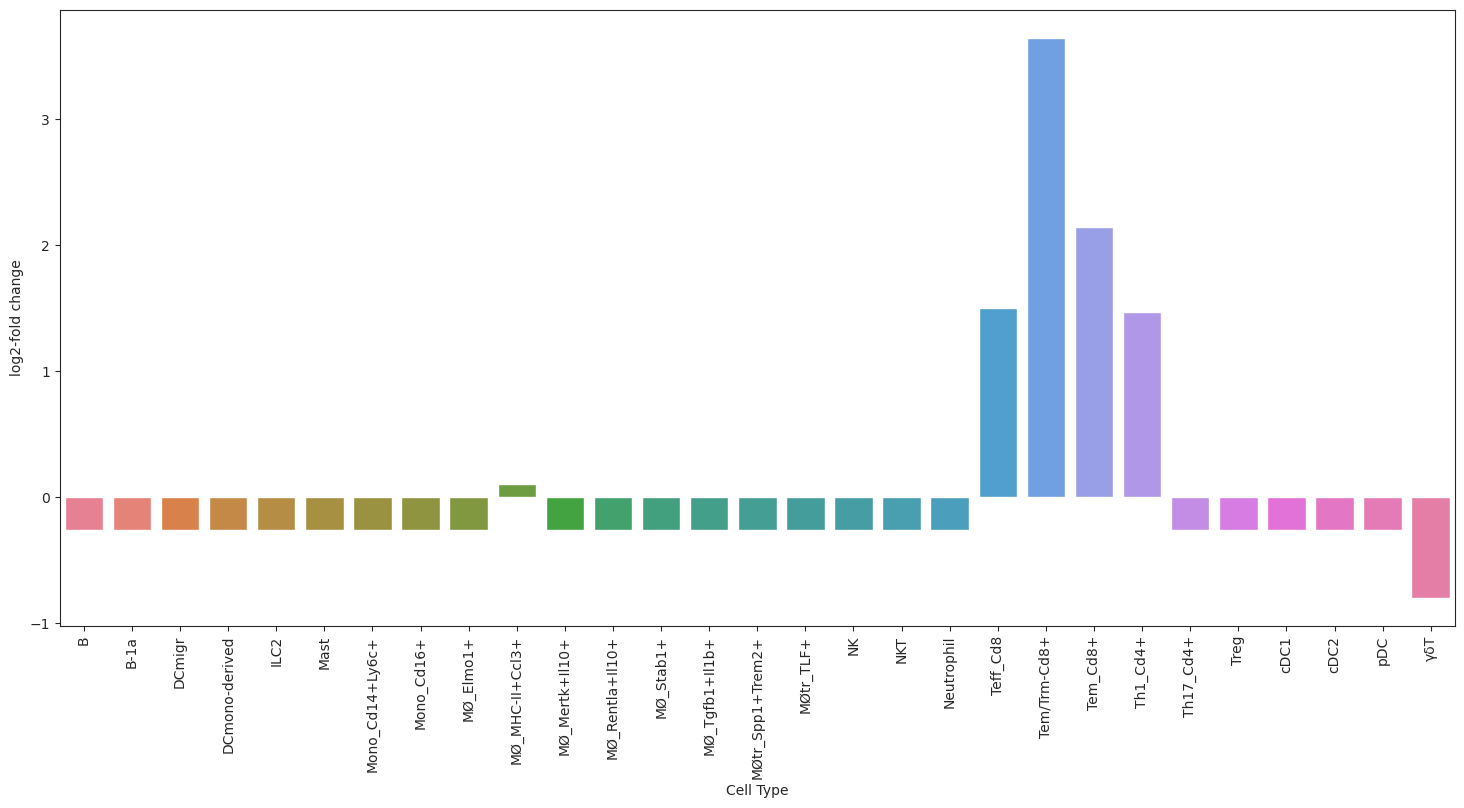

In [61]:
plt.figure(figsize=(18,8))
sns.barplot(data=sccoda_data["coda"].varm["effect_df_infection[T.MCMV]"], x="Cell Type", y="log2-fold change", hue="Cell Type")
plt.xticks(rotation=90)
plt.savefig("/home/acirnu/github/ACM_Mouse_Immune/Workflow/6_Calculate_statistically_relevant_changes/D_merge_lymphoids+myeloids_new_annotation/scCODA_infection_Pkp2.png", format='png')
plt.show()

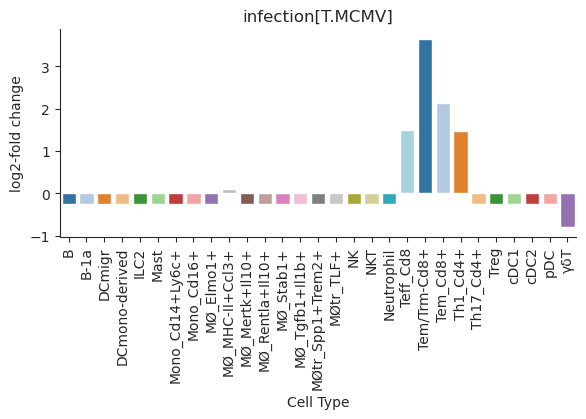

In [62]:
pt.pl.coda.effects_barplot(sccoda_data, "coda", "infection")
plt.show()